In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
# Loading the dataset
raw_data = pd.read_csv('Test.csv')
raw_data.head()

,Item_Id,Date,State_of_Country,Market_Category,Product_Category,Grade,Demand,High_Cap_Price
0,IT_265079,2014-01-19,0,3,0,0,0.1,5303
1,IT_265087,2014-01-19,0,268,0,2,1.4,10492
2,IT_265107,2014-01-19,0,320,0,0,13.4,24706
3,IT_265139,2014-01-19,17,358,0,3,5.5,23464
4,IT_265142,2014-01-19,18,23,5,2,0.0,6222


In [3]:
# Dropping the ID Column
raw_data.drop('Item_Id',axis=1,inplace=True)

In [4]:
# Converting the string date in Datetime
raw_data['Date'] = pd.to_datetime(raw_data['Date'])
raw_data['Date'][0]

Timestamp('2014-01-19 00:00:00')

In [5]:
month_vals = []
for i in range(raw_data.shape[0]):
    month_vals.append(raw_data['Date'][i].month)
month_vals[:25]

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [6]:
raw_data['Month Value'] = month_vals
raw_data.head()

,Date,State_of_Country,Market_Category,Product_Category,Grade,Demand,High_Cap_Price,Month Value
0,2014-01-19,0,3,0,0,0.1,5303,1
1,2014-01-19,0,268,0,2,1.4,10492,1
2,2014-01-19,0,320,0,0,13.4,24706,1
3,2014-01-19,17,358,0,3,5.5,23464,1
4,2014-01-19,18,23,5,2,0.0,6222,1


In [7]:
weeks_vals = []
for i in range(raw_data.shape[0]):
    weeks_vals.append(raw_data['Date'][i].weekday())
weeks_vals[:25]

[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 0, 0, 0, 0, 0, 0, 0, 0]

In [8]:
raw_data['Day of Week'] = weeks_vals
raw_data.head()

,Date,State_of_Country,Market_Category,Product_Category,Grade,Demand,High_Cap_Price,Month Value,Day of Week
0,2014-01-19,0,3,0,0,0.1,5303,1,6
1,2014-01-19,0,268,0,2,1.4,10492,1,6
2,2014-01-19,0,320,0,0,13.4,24706,1,6
3,2014-01-19,17,358,0,3,5.5,23464,1,6
4,2014-01-19,18,23,5,2,0.0,6222,1,6


In [9]:
date_cleaned = raw_data.drop('Date',axis=1)
date_cleaned.head()

,State_of_Country,Market_Category,Product_Category,Grade,Demand,High_Cap_Price,Month Value,Day of Week
0,0,3,0,0,0.1,5303,1,6
1,0,268,0,2,1.4,10492,1,6
2,0,320,0,0,13.4,24706,1,6
3,17,358,0,3,5.5,23464,1,6
4,18,23,5,2,0.0,6222,1,6


In [10]:
date_cleaned['State_of_Country'].nunique()

20

In [11]:
state_dumm = pd.get_dummies(date_cleaned['State_of_Country'],drop_first=True)
state_dumm.head()

,1,2,3,4,5,6,7,8,9,11,12,15,17,18,19,20,21,22,23
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [12]:
missing_columns = set(range(1,24))-set(state_dumm.columns)
missing_columns

{10, 13, 14, 16}

In [13]:
for i in missing_columns:
    state_dumm[i] = 0
state_dumm.set_axis(range(1,24),axis=1,inplace=True)

In [14]:
state_dumm.columns = ['State_1','State_2','State_3','State_4','State_5','State_6','State_7','State_8','State_9','State_10','State_11','State_12','State_13','State_14','State_15','State_16','State_17','State_18','State_19','State_20','State_21','State_22','State_23']

In [15]:
pd.options.display.max_columns = 25
state_dumm.head()

,State_1,State_2,State_3,State_4,State_5,State_6,State_7,State_8,State_9,State_10,State_11,State_12,State_13,State_14,State_15,State_16,State_17,State_18,State_19,State_20,State_21,State_22,State_23
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [16]:
date_cleaned.drop('State_of_Country',axis=1,inplace=True)
state_data = pd.concat([date_cleaned,state_dumm],axis=1)
state_data.head()

,Market_Category,Product_Category,Grade,Demand,High_Cap_Price,Month Value,Day of Week,State_1,State_2,State_3,State_4,State_5,...,State_12,State_13,State_14,State_15,State_16,State_17,State_18,State_19,State_20,State_21,State_22,State_23
0,3,0,0,0.1,5303,1,6,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0
1,268,0,2,1.4,10492,1,6,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0
2,320,0,0,13.4,24706,1,6,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0
3,358,0,3,5.5,23464,1,6,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0
4,23,5,2,0.0,6222,1,6,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0


In [17]:
## Check Point
df = state_data.copy()

In [18]:
df['Product_Category'].value_counts()

0     2826
10    1228
1      608
13     512
11     138
12     122
14      95
15      66
6       44
16      40
5       33
7       23
3       11
2        9
9        5
17       2
4        1
Name: Product_Category, dtype: int64

In [19]:
df['Product_Category'] = df['Product_Category'].map({0:0,1:1,2:1,3:1,4:1,5:1,6:1,7:1,8:1,9:1,10:1,11:2,12:2,13:2,14:2,15:2,16:2,17:2})

In [20]:
df['Product_Category'].value_counts()

0    2826
1    1962
2     975
Name: Product_Category, dtype: int64

In [21]:
catogories = pd.get_dummies(df['Product_Category'],drop_first=True)
catogories.columns = ['Product_1','Product_2']

In [22]:
df.drop('Product_Category',axis=1,inplace=True)

In [23]:
df = pd.concat([df,catogories],axis=1)
df.head()

,Market_Category,Grade,Demand,High_Cap_Price,Month Value,Day of Week,State_1,State_2,State_3,State_4,State_5,State_6,...,State_14,State_15,State_16,State_17,State_18,State_19,State_20,State_21,State_22,State_23,Product_1,Product_2
0,3,0,0.1,5303,1,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0
1,268,2,1.4,10492,1,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0
2,320,0,13.4,24706,1,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0
3,358,3,5.5,23464,1,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0
4,23,2,0.0,6222,1,6,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,1,0


In [24]:
df['Grade'].unique()

array([0, 2, 3, 1], dtype=int64)

In [25]:
grade = pd.get_dummies(df['Grade'],drop_first=True)
grade.columns = ['Grade_1','Grade_2','Grade_3']

In [26]:
df.drop('Grade',axis=1,inplace=True)
df = pd.concat([df,grade],axis=1)
df.head()

,Market_Category,Demand,High_Cap_Price,Month Value,Day of Week,State_1,State_2,State_3,State_4,State_5,State_6,State_7,...,State_17,State_18,State_19,State_20,State_21,State_22,State_23,Product_1,Product_2,Grade_1,Grade_2,Grade_3
0,3,0.1,5303,1,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0
1,268,1.4,10492,1,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0
2,320,13.4,24706,1,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0
3,358,5.5,23464,1,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1
4,23,0.0,6222,1,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,1,0


In [27]:
# CheckPoint 2
df2 = df.copy()

In [28]:
pd.options.display.max_rows = 300
df2['Market_Category'].value_counts()

310    298
23     252
55     250
65     239
14     160
137    147
37     138
274    127
338    117
3      114
148    114
364    109
446    108
449    107
330    105
107     99
196     97
268     90
11      89
360     88
238     82
294     80
365     77
296     72
452     72
353     70
345     65
0       65
90      63
282     63
340     60
211     58
355     56
230     50
231     49
332     49
307     49
57      47
450     45
375     45
437     44
459     42
76      40
151     40
443     37
379     36
58      36
188     36
116     34
436     33
441     33
286     32
198     32
372     30
337     27
300     27
93      27
331     26
101     26
159     25
271     25
468     24
240     23
108     23
179     22
354     20
320     20
453     19
220     19
132     18
366     18
386     17
373     16
361     16
469     15
44      15
266     15
178     15
134     15
356     14
377     14
444     14
401     14
98      13
258     13
162     13
400     13
175     12
190     12
94      12
396     12

In [29]:
df2['Market_Category'].nunique()

240

In [30]:
vals = set(df2['Market_Category'])
vals

{0,
 3,
 4,
 6,
 7,
 9,
 11,
 13,
 14,
 15,
 18,
 21,
 23,
 27,
 29,
 30,
 37,
 38,
 41,
 43,
 44,
 46,
 47,
 50,
 51,
 53,
 55,
 57,
 58,
 59,
 60,
 62,
 63,
 64,
 65,
 66,
 69,
 70,
 74,
 76,
 77,
 83,
 84,
 86,
 90,
 93,
 94,
 97,
 98,
 100,
 101,
 102,
 103,
 106,
 107,
 108,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 118,
 121,
 123,
 126,
 128,
 129,
 131,
 132,
 134,
 137,
 140,
 141,
 146,
 147,
 148,
 151,
 153,
 155,
 157,
 159,
 162,
 163,
 167,
 168,
 171,
 172,
 174,
 175,
 178,
 179,
 180,
 183,
 186,
 188,
 190,
 196,
 198,
 200,
 203,
 206,
 210,
 211,
 215,
 219,
 220,
 224,
 225,
 228,
 230,
 231,
 234,
 238,
 240,
 241,
 247,
 249,
 252,
 256,
 257,
 258,
 259,
 261,
 263,
 266,
 267,
 268,
 270,
 271,
 273,
 274,
 275,
 276,
 277,
 278,
 279,
 280,
 282,
 285,
 286,
 293,
 294,
 295,
 296,
 297,
 298,
 299,
 300,
 303,
 304,
 307,
 308,
 309,
 310,
 311,
 312,
 316,
 320,
 326,
 327,
 329,
 330,
 331,
 332,
 334,
 335,
 336,
 337,
 338,
 339,
 340,
 341,
 342,
 343,

In [31]:
for i in vals:
    if i < 100:
        df2['Market_Category'].replace(i,0,inplace=True)
    if 100 <= i < 200:
        df2['Market_Category'].replace(i,1,inplace=True)
    if 200 <= i < 300:
        df2['Market_Category'].replace(i,2,inplace=True)
    if 300 <= i < 400:
        df2['Market_Category'].replace(i,3,inplace=True)
    else:
        df2['Market_Category'].replace(i,4,inplace=True)

In [32]:
df2['Market_Category'].value_counts()

0    1684
3    1600
1     921
2     896
4     662
Name: Market_Category, dtype: int64

In [33]:
mar_dum = pd.get_dummies(df2['Market_Category'],drop_first=True)
mar_dum.columns = ['Market_Category1','Market_Category2','Market_Category3','Market_Category4']
mar_dum.head()

,Market_Category1,Market_Category2,Market_Category3,Market_Category4
0,0,0,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,1,0
4,0,0,0,0


In [34]:
#creating the checkpoint
df3 = df2.copy()

In [35]:
df3 = pd.concat([df.drop('Market_Category',axis=1),mar_dum],axis=1)

In [36]:
df3.head()

,Demand,High_Cap_Price,Month Value,Day of Week,State_1,State_2,State_3,State_4,State_5,State_6,State_7,State_8,...,State_21,State_22,State_23,Product_1,Product_2,Grade_1,Grade_2,Grade_3,Market_Category1,Market_Category2,Market_Category3,Market_Category4
0,0.1,5303,1,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0
1,1.4,10492,1,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1,0,0
2,13.4,24706,1,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0
3,5.5,23464,1,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,1,0
4,0.0,6222,1,6,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0,0,0


In [37]:
df3['Demand'].describe()

count     5763.000000
mean        67.695471
std        486.501858
min          0.000000
25%          0.600000
50%          2.300000
75%          8.400000
max      13242.600000
Name: Demand, dtype: float64

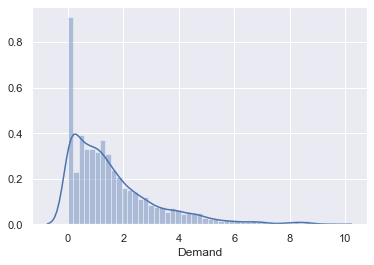

In [38]:
sns.distplot(np.log1p(df3['Demand']))

In [39]:
pd.options.display.float_format = '{:9.2f}'.format
df3['High_Cap_Price'].describe()

count        5763.00
mean        37321.09
std       1998985.23
min             1.00
25%          7244.00
50%          9364.00
75%         12562.50
max     151760923.00
Name: High_Cap_Price, dtype: float64

In [40]:
pd.options.display.max_rows = None
df3['High_Cap_Price'].value_counts()

7633         6
6589         5
10302        4
8425         4
7648         4
9585         4
6859         4
10287        4
7722         4
7231         4
7306         4
10585        4
10711        4
7989         4
11685        4
7084         4
7974         4
9069         4
7409         3
7501         3
8329         3
7204         3
7485         3
9438         3
8437         3
9650         3
7354         3
7874         3
7381         3
6562         3
8617         3
7217         3
9258         3
7990         3
6908         3
10212        3
8127         3
10146        3
9644         3
9967         3
7893         3
7817         3
7136         3
7775         3
7765         3
7738         3
7819         3
9802         3
9960         3
3841         3
7979         3
10048        3
8003         3
12101        3
1964         3
10752        3
6630         3
7284         3
6678         3
7670         3
8594         3
9619         3
7450         3
9517         3
7482         3
6353         3
9605      

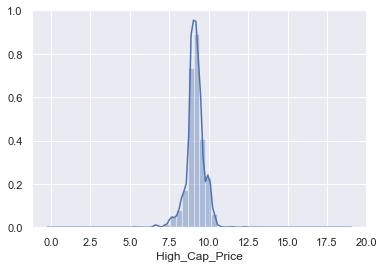

In [41]:
sns.distplot(np.log(df3['High_Cap_Price']))

In [42]:
df3.head()

,Demand,High_Cap_Price,Month Value,Day of Week,State_1,State_2,State_3,State_4,State_5,State_6,State_7,State_8,...,State_21,State_22,State_23,Product_1,Product_2,Grade_1,Grade_2,Grade_3,Market_Category1,Market_Category2,Market_Category3,Market_Category4
0,0.10,5303,1,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0
1,1.40,10492,1,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1,0,0
2,13.40,24706,1,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0
3,5.50,23464,1,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,1,0
4,0.00,6222,1,6,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0,0,0


In [43]:
df3.columns

Index(['Demand', 'High_Cap_Price', 'Month Value', 'Day of Week', 'State_1',
       'State_2', 'State_3', 'State_4', 'State_5', 'State_6', 'State_7',
       'State_8', 'State_9', 'State_10', 'State_11', 'State_12', 'State_13',
       'State_14', 'State_15', 'State_16', 'State_17', 'State_18', 'State_19',
       'State_20', 'State_21', 'State_22', 'State_23', 'Product_1',
       'Product_2', 'Grade_1', 'Grade_2', 'Grade_3', 'Market_Category1',
       'Market_Category2', 'Market_Category3', 'Market_Category4'],
      dtype='object')

In [44]:
cols_name = ['Demand','Month Value',
       'Day of Week', 'State_1', 'State_2', 'State_3', 'State_4', 'State_5',
       'State_6', 'State_7', 'State_8', 'State_9', 'State_10', 'State_11',
       'State_12', 'State_13', 'State_14', 'State_15', 'State_16', 'State_17',
       'State_18', 'State_19', 'State_20', 'State_21', 'State_22', 'State_23',
       'Product_1', 'Product_2', 'Grade_1', 'Grade_2', 'Grade_3',
       'Market_Category1', 'Market_Category2', 'Market_Category3',
       'Market_Category4','High_Cap_Price']

In [45]:
df3 = df3.reindex(columns=cols_name)

In [46]:
df3.head()

,Demand,Month Value,Day of Week,State_1,State_2,State_3,State_4,State_5,State_6,State_7,State_8,State_9,...,State_22,State_23,Product_1,Product_2,Grade_1,Grade_2,Grade_3,Market_Category1,Market_Category2,Market_Category3,Market_Category4,High_Cap_Price
0,0.10,1,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,5303
1,1.40,1,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0,0,10492
2,13.40,1,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,24706
3,5.50,1,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1,0,23464
4,0.00,1,6,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0,0,6222


In [47]:
df3.to_csv('Preprocessed_data.csv')